**<h1> Geometric Operations and Other Mathematical Tools with OpenCV</h1>**

---

## Operaciones Especiales en el Procesamiento de Imagenes.

- Las operaciones espaciales utilizan píxeles en una vecindad para determinar el valor actual de píxeles. Las aplicaciones incluyen filtrado y afilado. Se utilizan en muchos pasos de la visión por computadora, como la segmentación, y son un componente clave en los algoritmos de inteligencia artificial.


* Filtrado lineal
    * Filtrar ruido
    * Desenfoque gaussiano
    * Nitidez de imagen
* Bordes
* Mediana
* Umbral


---

### Descargando las imagenes necesarias para el LAB:

In [1]:
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png  

--11:05:35--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
           => `cameraman.jpeg'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 7,243 [image/jpeg]

    0K .......                                               100% @   6.91 MB/s

11:05:36 (6.91 MB/s) - `cameraman.jpeg' saved [7243/7243]

--11:05:36--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
           => `lenna.png'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 473,831 [image/png]

    0K .......... .......... .......... .......... .......... 10% @ 185.19 KB/s
   50K .......... .......... .......... .......... ..........

---

- Ahora importamos las librerias que usaremos en este LAB

In [2]:
# Se usa para ver las imágenes
import matplotlib.pyplot as plt

# Se utiliza para realizar el filtrado en una imagen.
import cv2

# Se utiliza para crear kernels para filtrar
import numpy as np

- Esta funcion graficara 2 imagenes lado a lado.

In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

- Las operaciones espaciales utilizan los píxeles de nanoretención para determinar el valor actual del píxel.

---

## Filtrado LIneal

- El filtrado implica mejorar una imagen, por ejemplo, eliminar el ruido de una imagen. El ruido es causado por una mala cámara o una mala compresión de la imagen. Los mismos factores que provocan el ruido pueden dar lugar a imágenes borrosas, podemos aplicar filtros para hacer más nítidas estas imágenes. La convolución es una forma estándar de filtrar una imagen, el filtro se llama kernel y diferentes kernels realizan diferentes tareas. Además, la convolución se utiliza para muchos de los algoritmos de inteligencia artificial más avanzados. Simplemente tomamos el producto escalar del kernel y como una porción de la imagen del mismo tamaño. Luego cambiamos el núcleo y repetimos.

Considere la siguiente imagen:

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


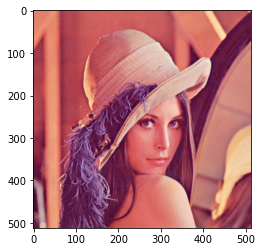

In [4]:
# Carga la imagen del archivo especificado
image = cv2.imread("lenna.png")
print(image)

# Convierte el orden del color de BGR (azul verde rojo) a RGB (rojo verde azul) y luego renderiza la imagen de la matriz de datos
plt.imshow (cv2.cvtColor (imagen, cv2.COLOR_BGR2RGB))

- Las imágenes con las que estamos trabajando se componen de valores RGB que son valores de 0 a 255. Cero significa ruido blanco, esto hace que la imagen se vea granulada:

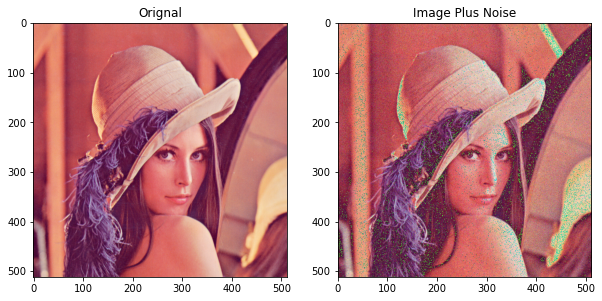

In [5]:
# Obtenga el número de filas y columnas en la imagen
rows, cols,_= image.shape

# Crea valores usando una distribución normal con una media de 0 y una desviación estándar de 15, los valores se convierten a uint8, lo que significa que los valores están entre 0 y 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)

# Agrega el ruido a la imagen
noisy_image = image + noise

# Traza la imagen original y la imagen con ruido usando la función definida en la parte superior
plot_image(image, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

- Cuando se agrega ruido a una imagen, a veces el valor puede ser mayor que 255; en este caso, 256 se resta del valor para ajustar el número manteniéndolo entre 0 y 255. Por ejemplo, considere una imagen con un valor RGB de 137 y agregamos ruido con un valor RGB de 215 obtenemos un valor RGB de 352. Luego restamos 256, el número total de valores posibles entre 0 y 255, para obtener un número entre 0 y 255.

---

## Filtrado de ruido
- Los filtros de suavizado promedian los píxeles dentro de un vecindario, a veces se les llama filtros de paso bajo. Para el filtrado medio, el kernel simplemente promedia los kernels en un vecindario.

In [7]:
# Cree un kernel que sea una matriz de 6 por 6 donde cada valor sea 1/36
kernel = np.ones((6,6))/36

- La función filter2D realiza una convolución 2D entre la imagen src y el kernel en cada canal de color de forma independiente. El parámetro ddepth tiene que ver con el tamaño de la imagen de salida, lo configuraremos en -1 para que la entrada y la salida sean del mismo tamaño.

In [8]:
# Filtra las imágenes usando el kernel
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

- Podemos trazar la imagen antes y después del filtrado; vemos que el ruido se reduce, pero la imagen se ve borrosa:

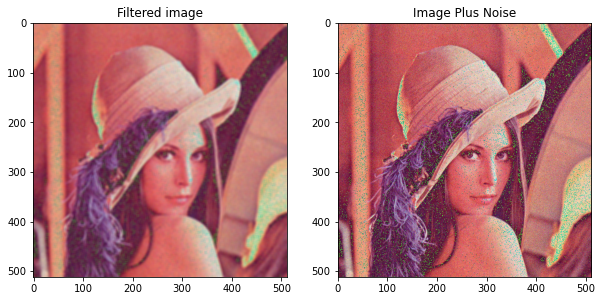

In [9]:
# Traza la imagen filtrada y con ruido usando la función definida en la parte superior
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

- 
Un kernel más pequeño mantiene la imagen nítida, pero filtra menos ruido, aquí probamos un kernel 4x4

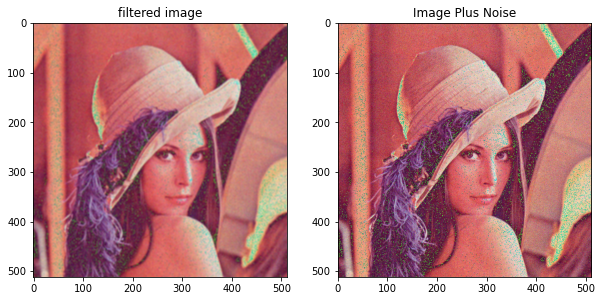

In [10]:
# Crea un kernel que es una matriz de 4 por 4 donde cada valor es 1/16
kernel = np.ones((4,4))/16

# Filtra las imágenes usando el kernel
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)

# Traza la imagen filtrada y con ruido usando la función definida en la parte superior
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

---

## Gaussian Blur

- La función GaussianBlur convoluciona la imagen de origen con el kernel gaussiano especificado. Filtra el ruido, pero conserva mejor los bordes. Tiene los siguientes parámetros:

Parámetros

imagen de entrada src; la imagen puede tener cualquier número de canales, que se procesan de forma independiente

ksize: tamaño del kernel gaussiano

sigmaX Desviación estándar del kernel gaussiano en la dirección X

sigmaY desviación estándar del kernel gaussiano en la dirección Y; si sigmaY es cero, se establece para que sea igual a sigmaX

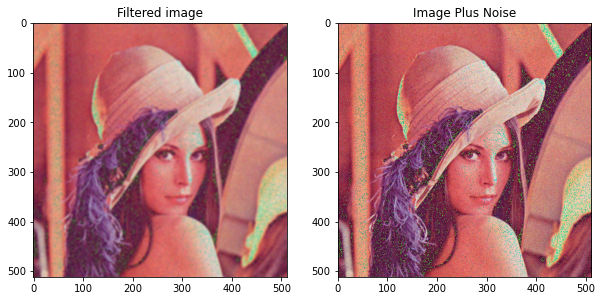

In [11]:
# Filtra las imágenes usando GaussianBlur en la imagen con ruido usando un kernel de 4 por 4
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)

# Traza la imagen filtrada y luego la imagen sin filtrar con ruido
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

- 
Sigma se comporta como el tamaño del filtro medio, un valor mayor de sigma hará que la imagen se vea borrosa, pero aún está limitado por el tamaño del filtro, allí establecemos sigma en 10

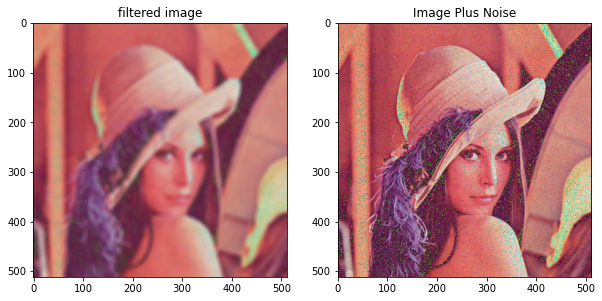

In [12]:

# Filtra las imágenes usando GaussianBlur en la imagen con ruido usando un kernel de 11 por 11
image_filtered = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)

# Traza la imagen filtrada y luego la imagen sin filtrar con ruido
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

- Vea lo que sucede cuando establece diferentes valores de sigmaX, sigmaY y / o usa kernels no cuadrados.
---

## Nitidez de imagen
- La nitidez de la imagen implica suavizar la imagen y calcular las derivadas. Podemos lograr la nitidez de la imagen aplicando el siguiente Kernel.

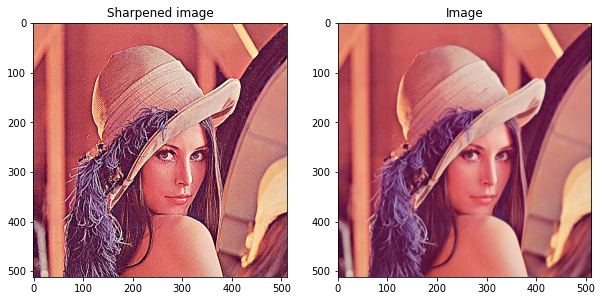

In [13]:

# Núcleo común para la nitidez de la imagen
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

# Aplica el filtro de nitidez usando kernel en la imagen original sin ruido
sharpened = cv2.filter2D(image, -1, kernel)

# Traza la imagen nítida y la imagen original sin ruido
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

--- 

## Bordes

- Los bordes son donde cambian las intensidades de píxeles. El gradiente de una función genera la tasa de cambio; podemos aproximar el gradiente de una imagen en escala de grises con convolución. Hay varios métodos para aproximar el gradiente, usemos el detector de bordes Sobel. Esto combina varias convoluciones y encuentra la magnitud del resultado. Considere la siguiente imagen:

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


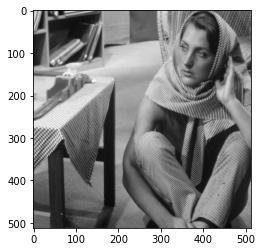

In [14]:
# Carga la imagen del archivo especificado
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)

# Muestra la imagen de la matriz de datos, observe cómo es 2 diemensional en lugar de 3 diemensional porque no tiene color
plt.imshow(img_gray ,cmap='gray')

- 
Suavizamos la imagen, esto disminuye los cambios que pueden ser causados ​​por el ruido que afectaría al degradado.

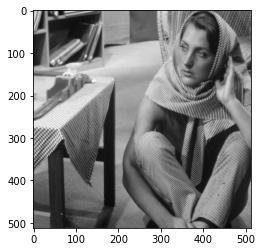

In [15]:

# Filtra las imágenes usando GaussianBlur en la imagen con ruido usando un kernel de 3 por 3 
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# Renderiza la imagen filtrada
plt.imshow(img_gray ,cmap='gray')

- Podemos aproximar la derivada en la dirección X o Y usando la función de Sobel, aquí están los parámetros:

src: imagen de entrada

ddepth: profundidad de la imagen de salida, ver combinaciones; en el caso de imágenes de entrada de 8 bits, resultará en derivadas truncadas

dx: orden de la derivada x

dx: orden de la derivada y

ksize tamaño del kernel Sobel extendido; debe ser 1, 3, 5 o 7

dx = 1 representa la derivada en la dirección x. La función aproxima la derivada convolucionando la imagen con el siguiente kernel

\begin{bmatrix}
1 & 0 & -1 \\\\
2 & 0 & -2 \\\\
1 & 0 & -1
\end{bmatrix}

- Podemos aplicar la funcion

In [16]:
ddepth = cv2.CV_16S
# Aplica el filtro a la imagen en la dirección X
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

- Podemos trazar el resultado

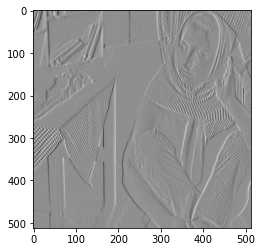

In [17]:
plt.imshow(grad_x,cmap='gray')

- dy = 1 representa la derivada en la dirección y. La función aproxima la derivada convolucionando la imagen con el siguiente kernel

\begin{bmatrix}
\ \ 1 & \ \ 2 & \ \ 1 \\\\
\ \ 0 & \ \ 0 & \ \ 0 \\\\
\-1 & -2 & -1
\end{bmatrix}


- Podemos aplicar la función y trazar el resultado.

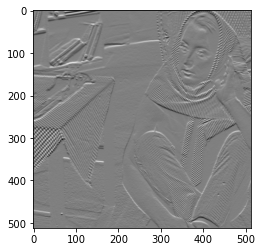

In [18]:
# Aplica el filtro a la imagen en la dirección Xgrad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')

- Podemos aproximar el gradiente calculando valores absolutos y convertir el resultado a 8 bits:

In [20]:
# Convierte los valores a un número entre 0 y 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

- Luego aplique la función addWeighted para calcular la suma de dos matrices de la siguiente manera:

In [21]:
# Agrega la derivada en la dirección X e Y
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

- Luego graficamos los resultados, vemos que la imagen con líneas tienen valores de alta intensidad que representan un gran gradiente

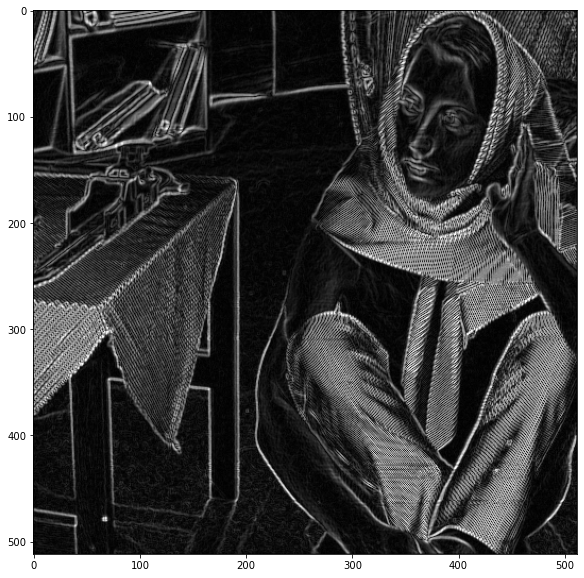

In [22]:
# Agranda la figura y renderiza la imagen
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

--- 

## Median


Los filtros de mediana encuentran la mediana de todos los píxeles debajo del área del núcleo y el elemento central se reemplaza con este valor de mediana.

Podemos aplicar filtros de mediana a imágenes normales, pero veamos cómo podemos usar un filtro de mediana para mejorar la segmentación. Considere el ejemplo del camarógrafo

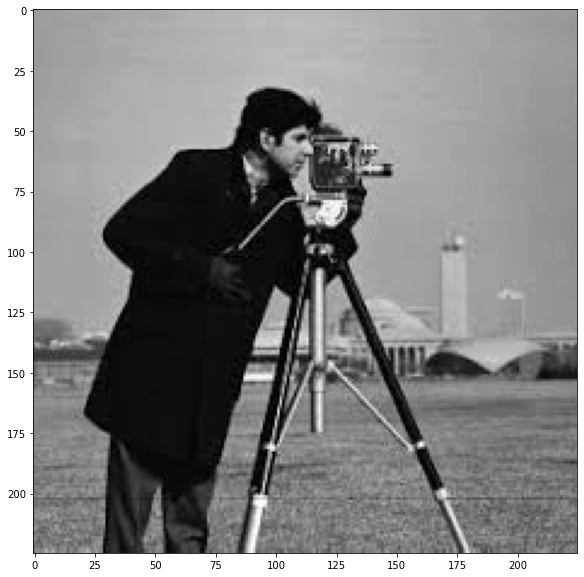

In [23]:
# Load the camera man image
image = cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

- Ahora apliquemos un filtro de mediana usando la función `medianBlur`. Los parámetros para esta función son:
`src`: la imagen 
`ksize`: tamaño del kernel

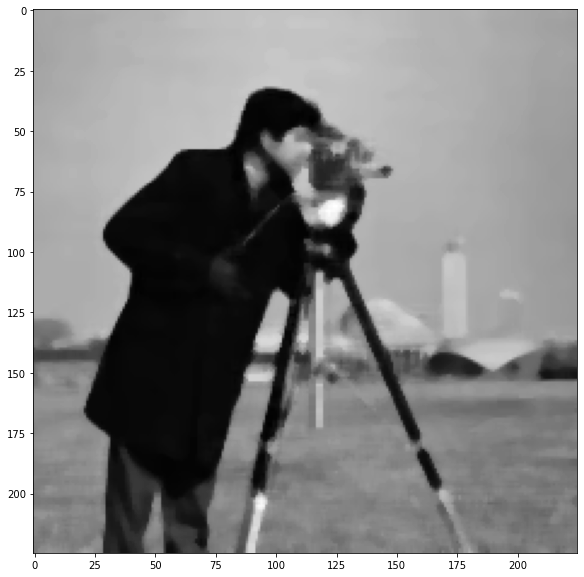

In [24]:
# Filtrar la imagen usando Desenfoque medio con un núcleo de tamaño 5
filtered_image = cv2.medianBlur(image, 5)

# Agranda la imagen cuando se renderiza
plt.figure(figsize=(10,10))

# Renderiza la imagen
plt.imshow(filtered_image,cmap="gray")


Nos gustaría encontrar al camarógrafo, pero el filtrado medio captura parte del fondo.

---


## Parámetros de función de umbralización

- `src`: La imagen a usar 
- `thresh`: El umbral 
- `maxval`: El maximo valor a usar 
- `tipo`: Tipo de filtrado

La función de umbral funciona mirando el valor de la escala de grises de cada píxel y asignando un valor si está por debajo del umbral y otro valor si está por encima del umbral. En nuestro ejemplo, el umbral es 0 (negro) y el tipo es binario inverso, por lo que si un valor está por encima del umbral, el valor asignado es 0 (negro) y si está por debajo o es igual al umbral, se utiliza el valor máximo 255 (blanco). Entonces, si el píxel es 0 negro, se le asigna 255 (blanco) y si el píxel no es negro, entonces se le asigna negro, que es lo que THRESH_BINARY_INV le dice a OpenCV que haga. Así es como funcionaría sin THRESH_OTSU.

- Dado que estamos usando THRESH_OTSU, significa que OpenCV decidirá un umbral óptimo. En nuestro ejemplo debajo del umbral, proporcionamos que no se use en el filtro que OpenCV usará uno óptimo.


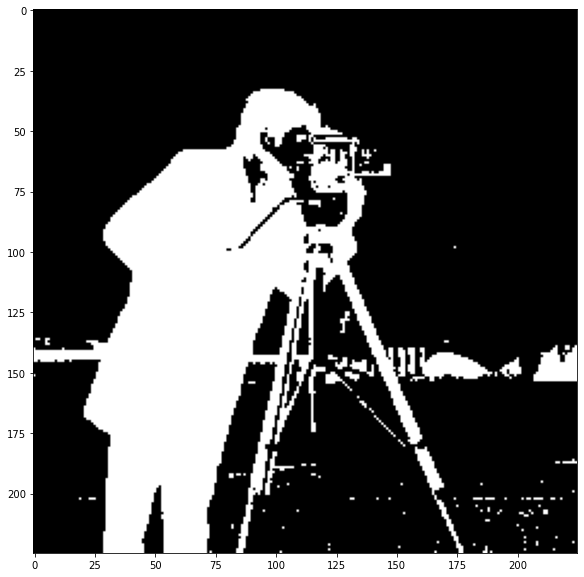

In [28]:
# Devuelve ret, que es el umbral utilizado, y outs, que es la imagen
ret, outs = cv2.threshold(src = image, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# Agranda la imagen cuando se renderiza
plt.figure(figsize=(10,10))

# Renderizar la imagen
plt.imshow(outs, cmap='gray')


Debido a que esos elementos son en su mayoría ceros, el filtro de mediana se filtrará en consecuencia: